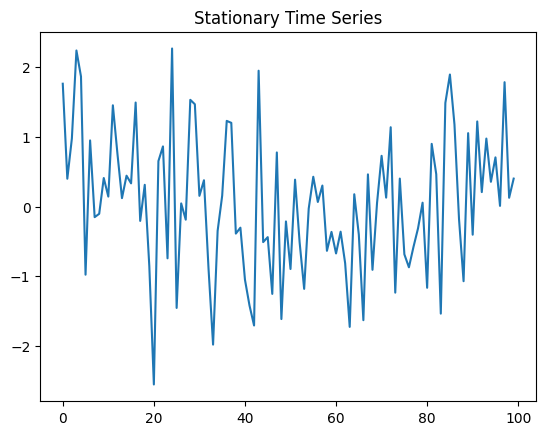

All Results (-9.298574759765579, 1.1285451053950947e-15, 0, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, 248.09069833477784)
ADF Statistic: -9.298574759765579
p-value: 1.1285451053950947e-15
Critical Values: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}
The series is stationary


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Generate a stationary time series (white noise)
np.random.seed(0)
stationary_series = np.random.normal(0, 1, 100)

# Plot the time series
plt.plot(stationary_series)
plt.title("Stationary Time Series")
plt.show()

# Perform Augmented Dickey-Fuller test
result = adfuller(stationary_series)
print('All Results', result)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation
if result[1] < 0.05:
    print("The series is stationary")
else:
    print("The series is not stationary")


In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\jayavaradhan.olivu\OneDrive - DISYS\Documents\Data Science\Data Science - Python\Python Practice\Data source\Temps.csv',index_col='DATE',parse_dates=True)
df.dropna()
print('Shape', df.shape)
df.head()

Shape (1825, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


### check if it's stationary or seasonal
    For first we plot the data

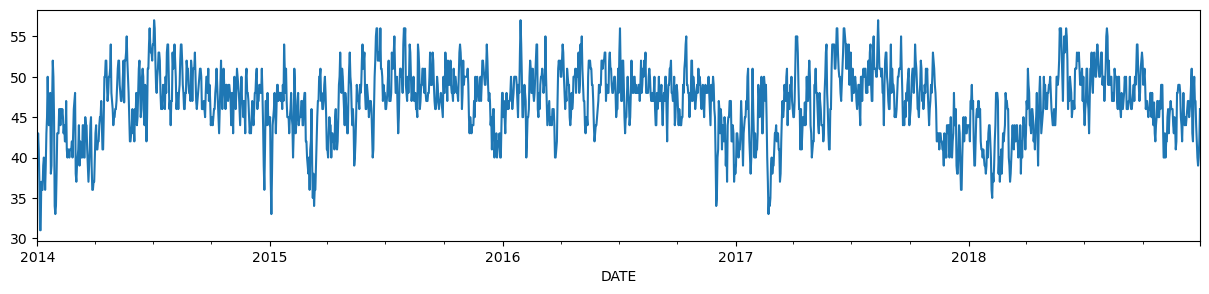

In [54]:
df['AvgTemp'].plot(figsize=(15, 3))
df = df=df.dropna()

### <b> let's some statistical test

In [7]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    # Fill missing values with the mean of the column
    dataset = dataset.fillna(dataset.mean())
    dftest = adfuller(dataset, autolag='AIC')
    print(f'''
            1. ADF Statistic: {dftest[0]}
            2. P-Value: {dftest[1]}  # (P stands for probability)
            3. Number of Lags Used: {dftest[2]}
            4. Number of Observations Used for ADF Regression and Critical Values Calculation: {dftest[3]}
            5. Critical Values:
            ''')
    for key, val in dftest[4].items():
        print(f'\t{key}: {val}')
ad_test(df['AvgTemp'])


            1. ADF Statistic: -6.59456311338979
            2. P-Value: 6.977825912591966e-09  # (P stands for probability)
            3. Number of Lags Used: 12
            4. Number of Observations Used for ADF Regression and Critical Values Calculation: 1812
            5. Critical Values:
            
	1%: -3.4339640110318004
	5%: -2.8631363845692475
	10%: -2.567619862152732


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [58]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
                         suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8368.098, Time=5.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10366.472, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8392.171, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9157.155, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19234.261, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8383.250, Time=2.71 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8383.888, Time=4.87 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8374.096, Time=6.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8347.087, Time=6.41 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8359.385, Time=5.94 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8345.230, Time=6.80 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8358.280, Time=7.46 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8346.328, Time=7.68 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8334.934, Time=7.14 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4152.681
Date:                Sun, 23 Jun 2024   AIC                           8321.362
Time:                        23:19:25   BIC                           8365.437
Sample:                    01-01-2014   HQIC                          8337.620
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1131      0.341      3.267      0.001       0.445       1.781
ar.L1          0.9761      0.007    133.029      0.000       0.962       0.990
ma.L1         -0.1291      0.023     -5.525      0.000      -0.175      -0.083
ma.L2         -0.2247      0.024     -9.471      0.000      -0.271      -0.178
ma.L3         -0.1990      0.024     -8.447      0.000      -0.245      -0.153
ma.L4         -0.1426      0.023     -6.308      0.000      -0.187      -0.098
ma.L5         -0.0543      0.024     -2.236      0.025      -0.102      -0.007
sigma2         5.4922      0.171     32.120      0.000       5.157       5.827
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                19.08
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### split data into training and testing

In [59]:
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [61]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1825, 5)
(1795, 5) (30, 5)


In [49]:
order = (1, 0, 5)  # Example order, adjust as needed

# Fit the ARIMA model
model = ARIMA(train['AvgTemp'], order=order)
fit_model = model.fit()

# Forecast/predict using the fitted model
# For example, you can forecast the next 10 steps
forecast = fit_model.forecast(steps=30)

# Print the forecasted values
print(forecast)

fit_model.summary()

2018-12-01    44.768046
2018-12-02    44.994982
2018-12-03    45.370067
2018-12-04    45.708997
2018-12-05    45.857463
2018-12-06    45.867713
2018-12-07    45.877817
2018-12-08    45.887778
2018-12-09    45.897599
2018-12-10    45.907280
2018-12-11    45.916825
2018-12-12    45.926234
2018-12-13    45.935511
2018-12-14    45.944656
2018-12-15    45.953672
2018-12-16    45.962561
2018-12-17    45.971324
2018-12-18    45.979962
2018-12-19    45.988479
2018-12-20    45.996875
2018-12-21    46.005153
2018-12-22    46.013313
2018-12-23    46.021358
2018-12-24    46.029289
2018-12-25    46.037108
2018-12-26    46.044816
2018-12-27    46.052416
2018-12-28    46.059908
2018-12-29    46.067294
2018-12-30    46.074575
Freq: D, Name: predicted_mean, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1795
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4083.793
Date:                Sun, 23 Jun 2024   AIC                           8183.586
Time:                        23:12:33   BIC                           8227.528
Sample:                    01-01-2014   HQIC                          8199.809
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5821      0.761     61.187      0.000      45.090      48.074
ar.L1          0.9859      0.005    190.358      0.000       0.976       0.996
ma.L1         -0.1462      0.023     -6.353      0.000      -0.191      -0.101
ma.L2         -0.2278      0.023     -9.698      0.000      -0.274      -0.182
ma.L3         -0.2079      0.023     -8.900      0.000      -0.254      -0.162
ma.L4         -0.1508      0.023     -6.614      0.000      -0.196      -0.106
ma.L5         -0.0623      0.024     -2.542      0.011      -0.110      -0.014
sigma2         5.5372      0.175     31.599      0.000       5.194       5.881
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### plotting the forcasted

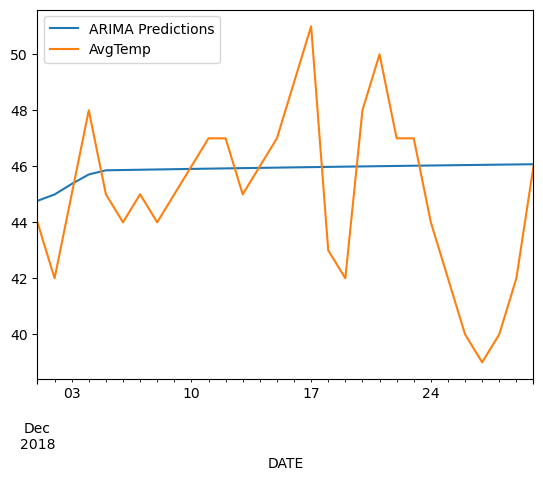

In [53]:
model = ARIMA(train['AvgTemp'], order=order)
fit_model = model.fit()

# Example: Forecasting or predicting the next 10 steps
start = len(train)
end = len(train) + len(test) - 1

# Predict using the fitted model
pred = fit_model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

# Plotting the predictions and actual values (test data)
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)
plt.legend()
plt.show()
